#  <u>*Month 2 ,Week 2 : Global Land Temperatures Analysis .*</u>

## *List of Content*

[*Analysis objective*](#Analysis_objective)<br>
[*Importing data*](#Importing_data)<br>
[*Data shape*](#Data_shape)<br>
[*Data info*](#Data_info)<br>
[*Data Cleaning*](#Data_Cleaning)<br>
[*Data describtion*](#Data_describtion)<br>
[*Features developments (SMA,CMA,EMA,EMWA)*](#Features_developments)<br>
[*Some Insights*](#Some_Insights)<br>
[*Feature Engineering*](#Feature_Engineering)<br>
[*Feature Selection*](#Feature_Selection)<br>

[*Analysis conducting using SARIMAX MODUL*](#Analysis_conducting)<br>

---

In [468]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,time

---

<a id="Analysis_objective"></a>

## <u>*Analysis objective*</u>
### *To predict the 'LandAverageTemperature' for the years 2016, 2017, and 2018, broken down on a monthly basis*

---

<a id="Importing_data"></a>

## *A.* <u>*Importing data*</u>

In [469]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


---

<a id="Data_shape"></a>

## *B.* <u>*Data shape*</u>

In [470]:
df.shape

(3192, 9)

---

<a id="Data_info"></a>

## *C.* <u>*Data info*</u>

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


---

<a id="Data_Cleaning"></a>

##  *D.* <u>*Data Cleaning*</u>

### *D.1 Converting the colnames to lower case*

In [472]:
import janitor
df=df.clean_names()

### *D.2 converting the date features "dt" to datetime type ,then renaming it with a proper name "date" and drop "dt"*

In [473]:
df["date"]=pd.to_datetime(df["dt"])

In [474]:
df.drop("dt",axis=1,inplace=True)

In [475]:
df.set_index("date",inplace=True)

### *D.3 na-values*

In [476]:
df.isna().sum().sum()
df.isna().sum()

landaveragetemperature                         12
landaveragetemperatureuncertainty              12
landmaxtemperature                           1200
landmaxtemperatureuncertainty                1200
landmintemperature                           1200
landmintemperatureuncertainty                1200
landandoceanaveragetemperature               1200
landandoceanaveragetemperatureuncertainty    1200
dtype: int64

> #### *The na_values for landaveragetemperature & landaveragetemperatureuncertainty are from '1750-11-01' to '1752-09-01'*
> #### *Since the data starts from '1849-12-01' for the other features we got 1200 rows with missed data*
> #### *We will drop the na-values for the 1st two features*

In [477]:
df.dropna(axis=0,how="all",inplace=True)

 *We will replce the na_values by apply Linear Regression as below steps:*<br>
 *1. Plot a scatter plot to see if there is a potentail relation between the x,y features*<br>
 *2. Visulize the correlation heatmap between x,y features*<br>
 *3. Apply Linear Regression and check the modul score and mse*<br>
 *4. Pridict the na_values using the Modul*<br>
 *5. Fill the na_values with the predicted values above*

#### *D.3.1 na-values for the features (LandMinTemperature & LandMaxTemperature)*<br>
+ *We will replce the na-values based on the LandAverageTemperature feature*<br>
+ *The reason is since the  average tempreture for any single day is the average between the min and max tempreture ,hence , we can do the same for the missing data , knowing that we are basicly using the <u>average</u> land tempreture to predict the <u>average</u> min and max tempreture*<br>

##### *D.3.1.1 Scatter plot*

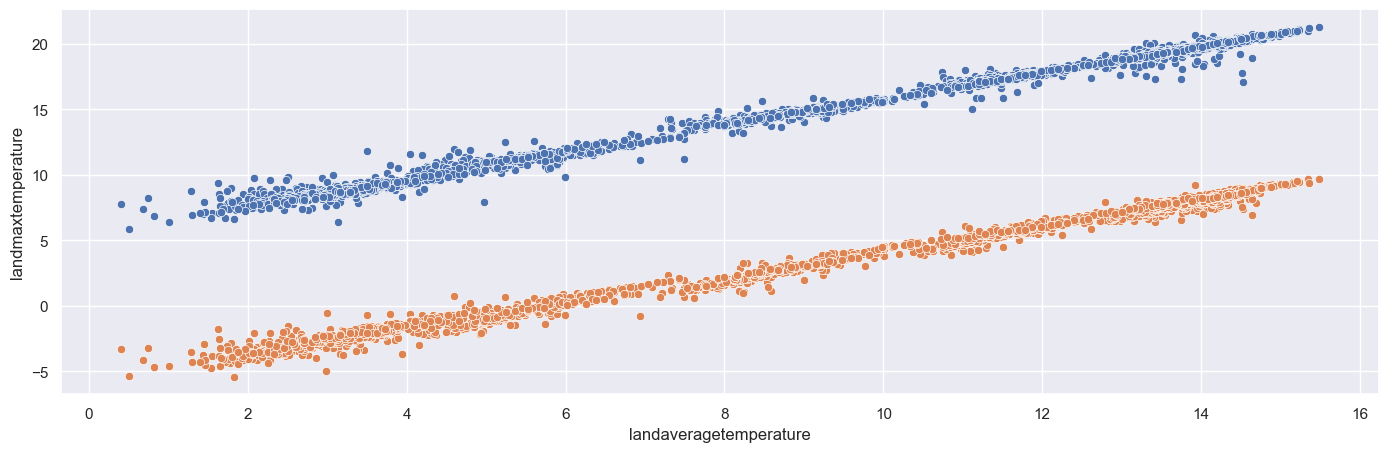

In [478]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.scatterplot(x=df["landaveragetemperature"],y=df["landmaxtemperature"]);
sns.scatterplot(x=df["landaveragetemperature"],y=df["landmintemperature"]);

##### *D.3.1.2 Visualize the correlation heatmap*

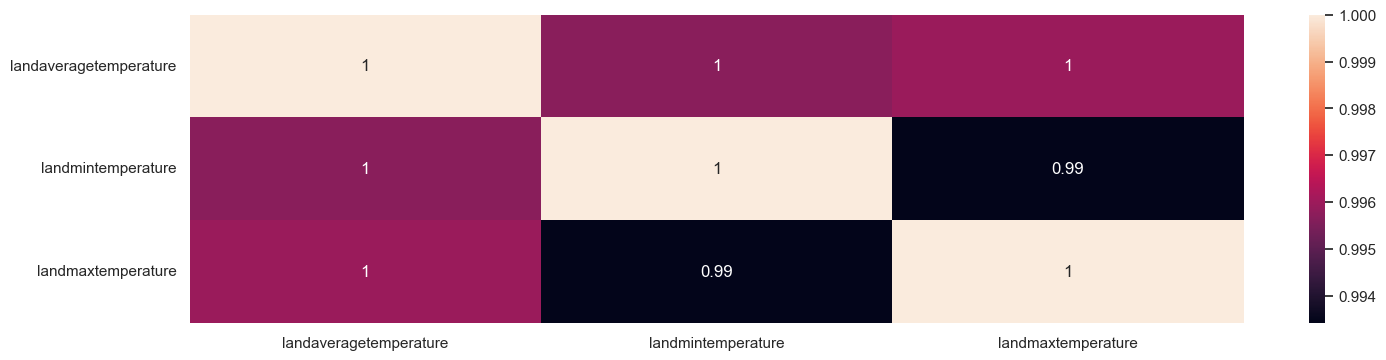

In [479]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(df[["landaveragetemperature","landmintemperature","landmaxtemperature"]].iloc[1200:].corr(),annot=True);

##### *D.3.1.3 Applying Linear Regression modul*

In [480]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [481]:
y=df[["landmintemperature","landmaxtemperature"]].iloc[1200:]    ## Notice that we have eleminate the na-values from the modul
x=df[["landaveragetemperature"]].iloc[1200:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=0)
modul=LinearRegression().fit(xtrain,ytrain)
modul.score(xtrain,ytrain)

0.9920616696476057

In [482]:
r2_score(ytest,modul.predict(xtest))

0.990717555008879

In [483]:
mean_squared_error(ytest,modul.predict(xtest))

0.16995740012776062

*By looking at all the above results (<u>high correlation,high score on the training data ,high r^2 score, and low mse</u>) we will assure that this approch is logical* 

##### *D.3.1.4 Predict na values*

In [484]:
modul.predict(df[["landaveragetemperature"]].iloc[:1188])

array([[-2.63152045,  8.7795045 ],
       [-2.58389278,  8.82890366],
       [-0.1121137 , 11.39261961],
       ...,
       [ 3.06047257, 14.68320901],
       [ 0.03562928, 11.54585784],
       [-3.71140506,  7.659454  ]])

##### *D.3.1.5 Filling the na_values with the above predicted values*

In [485]:
df["landmaxtemperature"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperature"]].iloc[:1188])[0:,[1]]),3)[0]
df["landmintemperature"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperature"]].iloc[:1188])[0:,[0]]),3)[0]

In [486]:
df.head()

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
date,,,,,,,,
1750-01-01,3.034,3.574,8.780,NaN,-2.632,NaN,NaN,NaN
1750-02-01,3.083,3.702,8.829,NaN,-2.584,NaN,NaN,NaN
1750-03-01,5.626,3.076,11.393,NaN,-0.112,NaN,NaN,NaN
1750-04-01,8.490,2.451,14.280,NaN,2.672,NaN,NaN,NaN
1750-05-01,11.573,2.072,17.388,NaN,5.668,NaN,NaN,NaN


#### *D.3.2 na-values for the features (landmintemperatureuncertainty & landmaxtemperatureuncertainty)*<br>
+ *We will replce the na-values based on the landaveragetemperatureuncertainty feature*<br>
+ *The reason is simmiler to the previous one but apply between different features*

##### *D.3.2.1 Scatter plot*

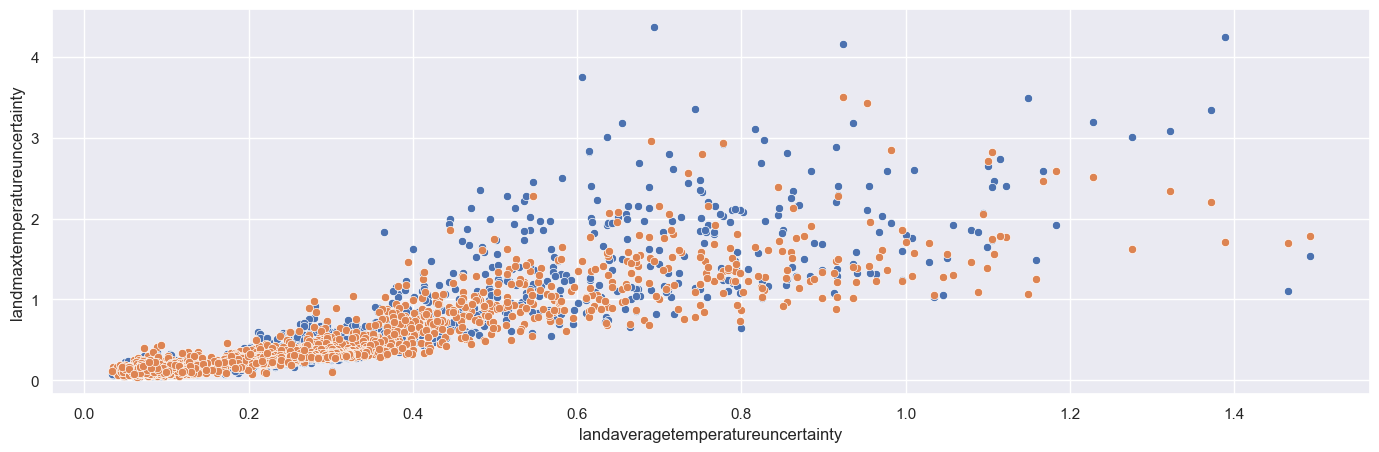

In [487]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.scatterplot(x=df["landaveragetemperatureuncertainty"],y=df["landmaxtemperatureuncertainty"]);
sns.scatterplot(x=df["landaveragetemperatureuncertainty"],y=df["landmintemperatureuncertainty"]);

##### *D.3.2.2 Visualize the correlation heatmap*

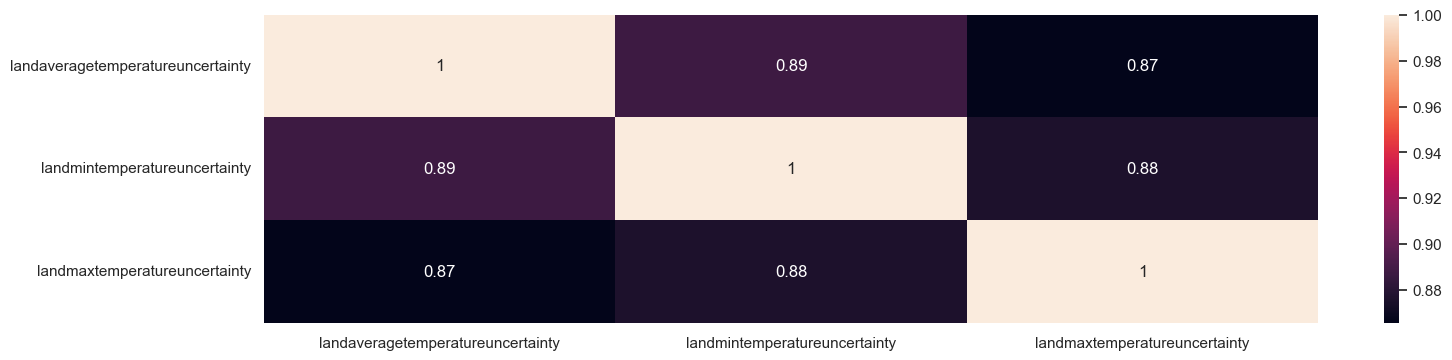

In [488]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(df[["landaveragetemperatureuncertainty","landmintemperatureuncertainty","landmaxtemperatureuncertainty"]].iloc[1200:].corr(),
            annot=True);

##### *D.3.2.3 Applying Linear Regression modul*

In [489]:
y=df[["landmintemperatureuncertainty","landmaxtemperatureuncertainty"]].iloc[1200:]
x=df[["landaveragetemperatureuncertainty"]].iloc[1200:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=0)
modul=LinearRegression().fit(xtrain,ytrain)
modul.score(xtrain,ytrain)

0.7769060302669697

In [490]:
r2_score(ytest,modul.predict(xtest))

0.7537632111842387

In [491]:
mean_squared_error(ytest,modul.predict(xtest))

0.0757312403792372

*By looking at all the above results (<u>high correlation,Good score on the training data ,Good r^2 score, and low mse</u>) we will assure that this approch is logical* 

##### *D.3.2.4 Predict na values*

In [492]:
modul.predict(df[["landaveragetemperatureuncertainty"]].iloc[:1188])

array([[6.21372209, 7.68167831],
       [6.43818403, 7.96151294],
       [5.34042485, 6.5929467 ],
       ...,
       [1.23171916, 1.47066124],
       [2.24881233, 2.73866191],
       [1.53860072, 1.85324765]])

##### *D.3.2.5 Filling the na_values with the above predicted values*

In [493]:
df["landmaxtemperatureuncertainty"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperatureuncertainty"]].iloc[:1188])[0:,[1]]),3)[0]
df["landmintemperatureuncertainty"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperatureuncertainty"]].iloc[:1188])[0:,[0]]),3)[0]

In [494]:
df.head()

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
date,,,,,,,,
1750-01-01,3.034,3.574,8.780,7.682,-2.632,6.214,NaN,NaN
1750-02-01,3.083,3.702,8.829,7.962,-2.584,6.438,NaN,NaN
1750-03-01,5.626,3.076,11.393,6.593,-0.112,5.340,NaN,NaN
1750-04-01,8.490,2.451,14.280,5.227,2.672,4.244,NaN,NaN
1750-05-01,11.573,2.072,17.388,4.398,5.668,3.580,NaN,NaN


#### *D.3.3 na-values for the features (LandAndOceanAverageTemperatureUncertainty)*<br>
+ *We will replce the na-values based on the LandAverageTemperatureUncertainty feature*<br>

##### *D.3.3.1 Scatter plot*

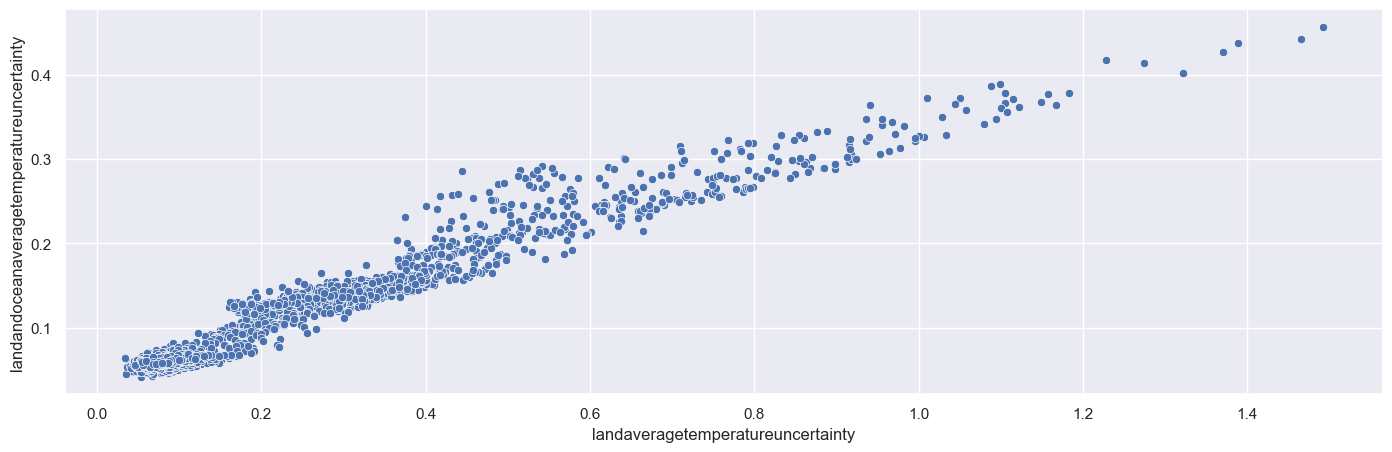

In [495]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.scatterplot(x=df["landaveragetemperatureuncertainty"],y=df["landandoceanaveragetemperatureuncertainty"]);

##### *D.3.3.2 Visualize the correlation heatmap*

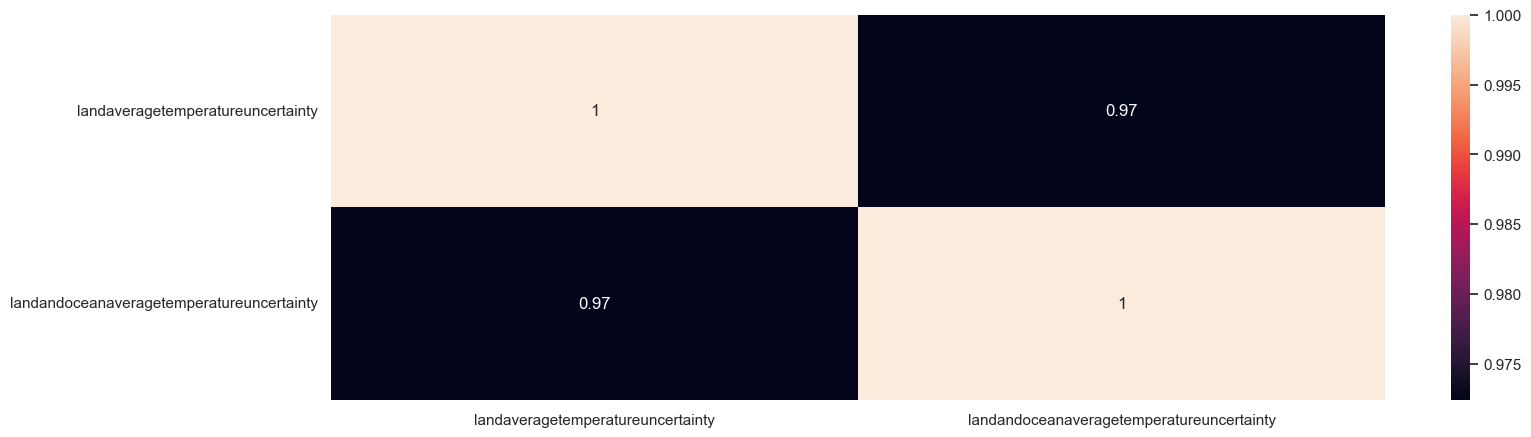

In [496]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.heatmap(df[["landaveragetemperatureuncertainty","landandoceanaveragetemperatureuncertainty"]].corr(),annot=True);

##### *D.3.3.3 Applying Linear Regression modul*

In [497]:
y=df["landandoceanaveragetemperatureuncertainty"].iloc[1200:]
x=df[["landaveragetemperatureuncertainty"]].iloc[1200:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=0)
modul=LinearRegression().fit(xtrain,ytrain)
modul.score(xtrain,ytrain)

0.9429483533126781

In [498]:
r2_score(ytest,modul.predict(xtest))

0.9457241361154468

In [499]:
mean_squared_error(ytest,modul.predict(xtest))

0.00030693711524963597

*By looking at all the above results (<u>high correlation,high score on the training data ,high r^2 score, and low mse</u>) we will assure that this approch is logical* 

##### *D.3.3.4 Predict na values*

In [500]:
modul.predict(df[["landaveragetemperatureuncertainty"]].iloc[:1188])

array([1.18142044, 1.22228082, 1.02244803, ..., 0.27451157, 0.45966016,
       0.33037537])

##### *D.3.3.5 Filling the na_values with the above predicted values*

In [501]:
df["landandoceanaveragetemperatureuncertainty"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperatureuncertainty"]].iloc[:1188])),3)[0]

In [502]:
df.head()

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
date,,,,,,,,
1750-01-01,3.034,3.574,8.780,7.682,-2.632,6.214,NaN,1.181
1750-02-01,3.083,3.702,8.829,7.962,-2.584,6.438,NaN,1.222
1750-03-01,5.626,3.076,11.393,6.593,-0.112,5.340,NaN,1.022
1750-04-01,8.490,2.451,14.280,5.227,2.672,4.244,NaN,0.823
1750-05-01,11.573,2.072,17.388,4.398,5.668,3.580,NaN,0.702


#### *D.3.4 na-values for the features (landandoceanaveragetemperature)*<br>
+ *We will replce the na-values based on the landaveragetemperature feature*<br>

##### *D.3.4.1 Scatter plot*

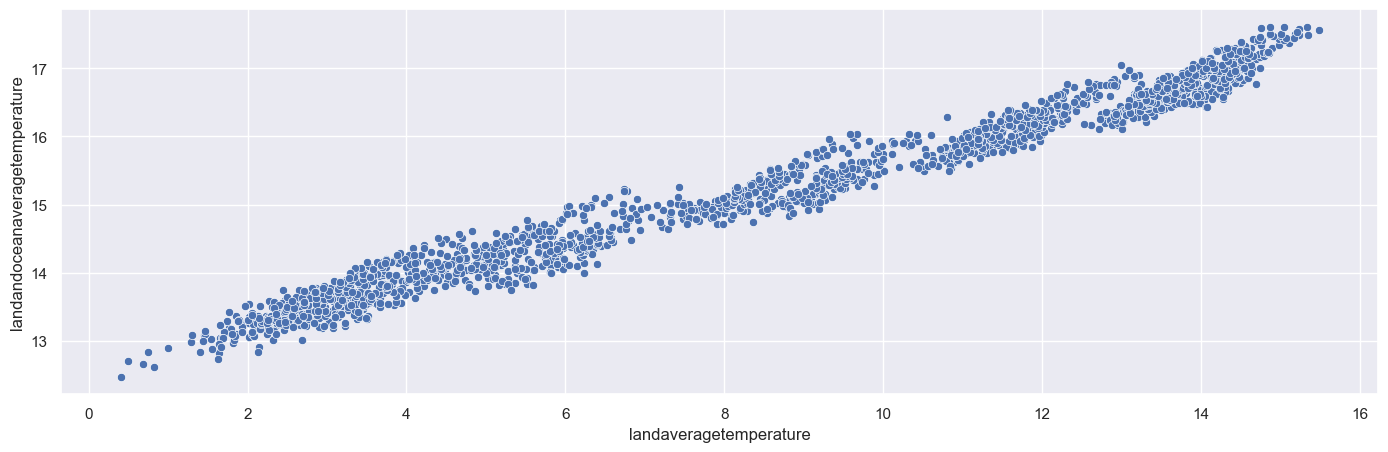

In [503]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.scatterplot(x=df["landaveragetemperature"],y=df["landandoceanaveragetemperature"]);

##### *D.3.4.2 Visualize the correlation heatmap*

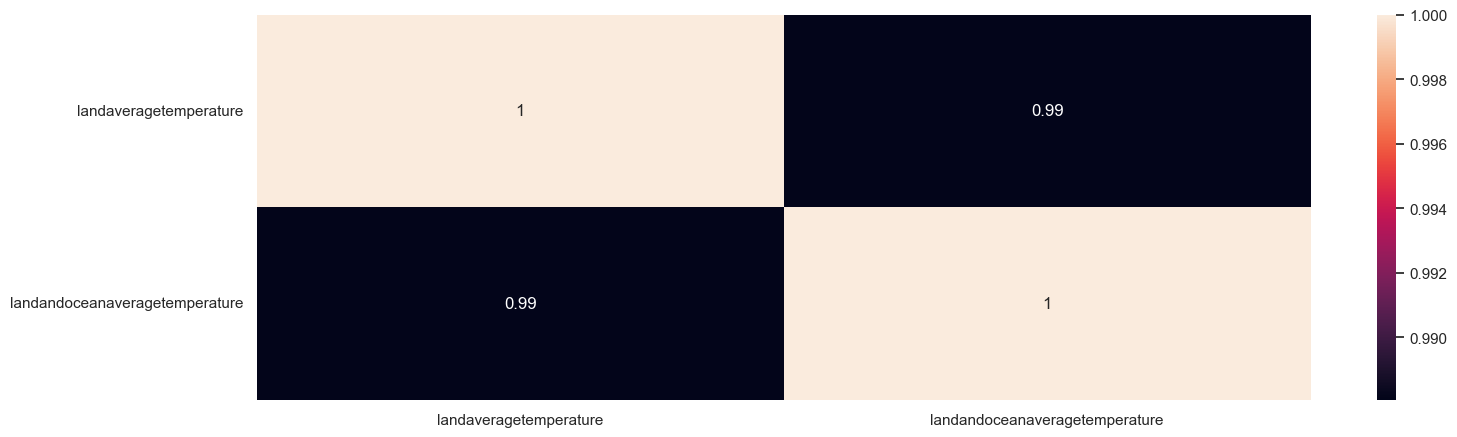

In [504]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.heatmap(df[["landaveragetemperature","landandoceanaveragetemperature"]].corr(),annot=True);

##### *D.3.4.3 Applying Linear Regression modul*

In [505]:
y=df["landandoceanaveragetemperature"].iloc[1200:]
x=df[["landaveragetemperature"]].iloc[1200:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=0)
modul=LinearRegression().fit(xtrain,ytrain)
modul.score(xtrain,ytrain)

0.9754781300233732

In [506]:
r2_score(ytest,modul.predict(xtest))

0.9778201803327764

In [507]:
mean_squared_error(ytest,modul.predict(xtest))

0.03705122936114347

*By looking at all the above results (<u>high correlation,high score on the training data ,high r^2 score, and low mse</u>) we will assure that this approch is logical* 

##### *D.3.4.4 Predict na values*

In [508]:
modul.predict(df[["landaveragetemperature"]].iloc[:1188])

array([13.58133663, 13.59577945, 14.34533211, ..., 15.30740048,
       14.39013431, 13.25386789])

##### *D.3.4.5 Filling the na_values with the above predicted values*

In [509]:
df["landandoceanaveragetemperature"].iloc[:1188]=round(pd.DataFrame(modul.predict(df[["landaveragetemperature"]].iloc[:1188])),3)[0]

In [510]:
df.head()

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
date,,,,,,,,
1750-01-01,3.034,3.574,8.780,7.682,-2.632,6.214,13.581,1.181
1750-02-01,3.083,3.702,8.829,7.962,-2.584,6.438,13.596,1.222
1750-03-01,5.626,3.076,11.393,6.593,-0.112,5.340,14.345,1.022
1750-04-01,8.490,2.451,14.280,5.227,2.672,4.244,15.189,0.823
1750-05-01,11.573,2.072,17.388,4.398,5.668,3.580,16.098,0.702


---

<a id="Data_describtion"></a>

##  *E.* <u>*Data describtion*</u>

### *E.1 Data describtion In table*

In [511]:
pd.DataFrame(df.describe())

,landaveragetemperature,landaveragetemperatureuncertainty,landmaxtemperature,landmaxtemperatureuncertainty,landmintemperature,landmintemperatureuncertainty,landandoceanaveragetemperature,landandoceanaveragetemperatureuncertainty
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000
mean,8.374731,0.938468,14.156483,1.924098,2.555015,1.592259,15.154912,0.339907
std,4.381310,1.096440,4.423786,2.407562,4.265734,1.929811,1.302071,0.350390
min,-2.080000,0.034000,3.624000,0.044000,-7.602000,0.045000,12.074000,0.042000
25%,4.312000,0.186750,10.014750,0.206000,-1.419250,0.230000,13.992750,0.107750
50%,8.610500,0.392000,14.452500,0.663000,2.737500,0.613000,15.189500,0.164000
75%,12.548250,1.419250,18.327000,3.012500,6.603250,2.466500,16.374250,0.493000
max,19.021000,7.880000,24.897000,17.095000,12.908000,13.765000,18.294000,2.556000


### *E.2 Data describtion Visualization*

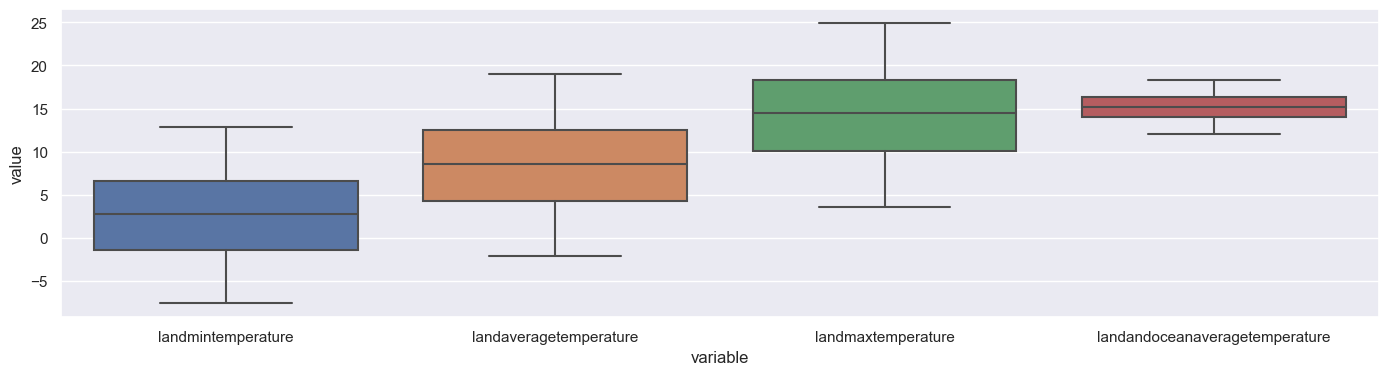

In [512]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landmintemperature","landaveragetemperature","landmaxtemperature","landandoceanaveragetemperature"]),
            x='variable', y='value');

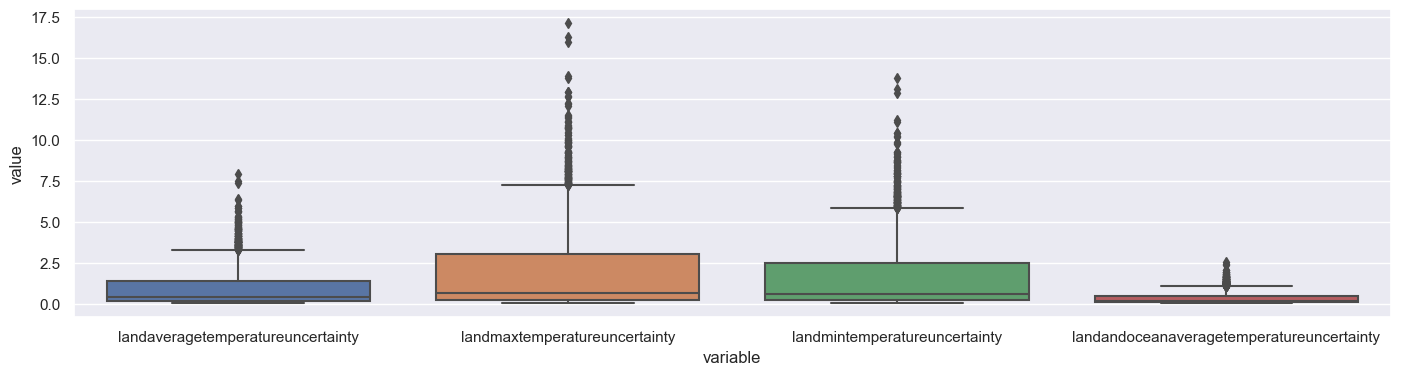

In [513]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(data=df.melt(value_vars=["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]),
            x='variable', y='value');

>  <font color=red>----> *In the 1st chart we can see that Non of the visualized variables have outliers, but the visualized variables In the 2nd chart have have outliers*<br>
> ----> *When revisualize these variables , we can clearly see that the uncertaintly were high in the beggining years and decreasong by year fowards.(-the the below line charts)*


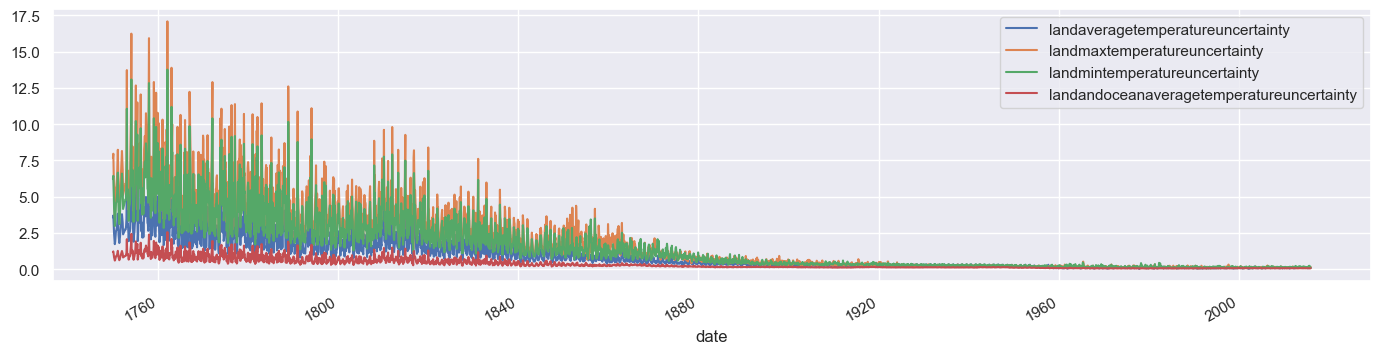

In [514]:
df[["landaveragetemperatureuncertainty","landmaxtemperatureuncertainty","landmintemperatureuncertainty",
                                    "landandoceanaveragetemperatureuncertainty"]].plot(figsize=(17, 4));

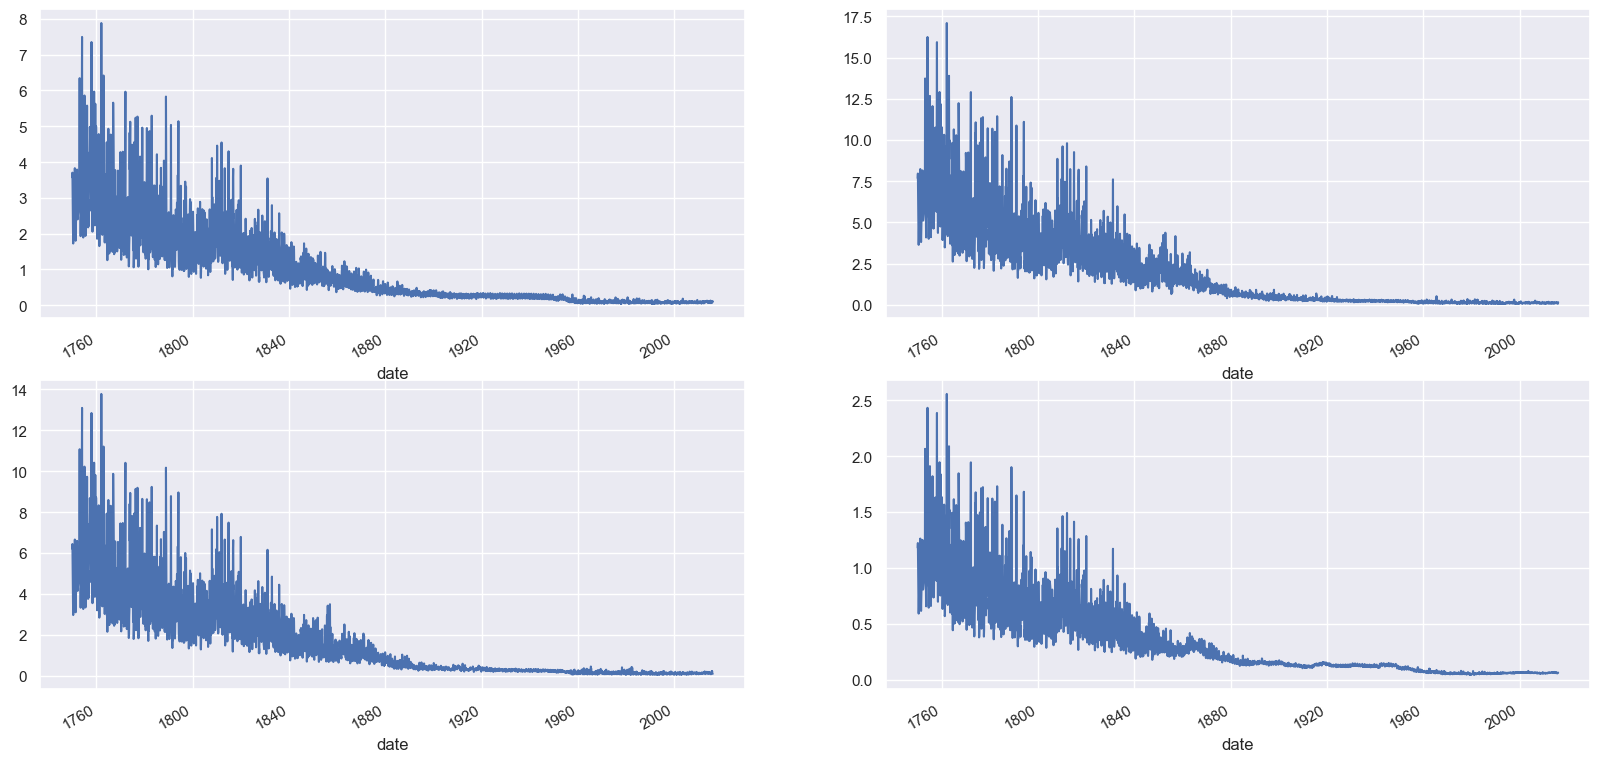

In [515]:
plt.subplot(221)
df["landaveragetemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(222)
df["landmaxtemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(223)
df["landmintemperatureuncertainty"].plot();
## -----------------------------------------------------------------------------------------------------------
plt.subplot(224)
df["landandoceanaveragetemperatureuncertainty"].plot();

> *--> This high uncertainty may be due to the leak of super technology that can increase the accurecy in data capturin*ty

<a id="Features_developments"></a>

## *F.* <u>*Features developments*</u> 
### ---> *Before diving in , lets look at the features developments during the past time -yearly basis*

### *F.1 SMA - Simple Moving Average (yearly)*

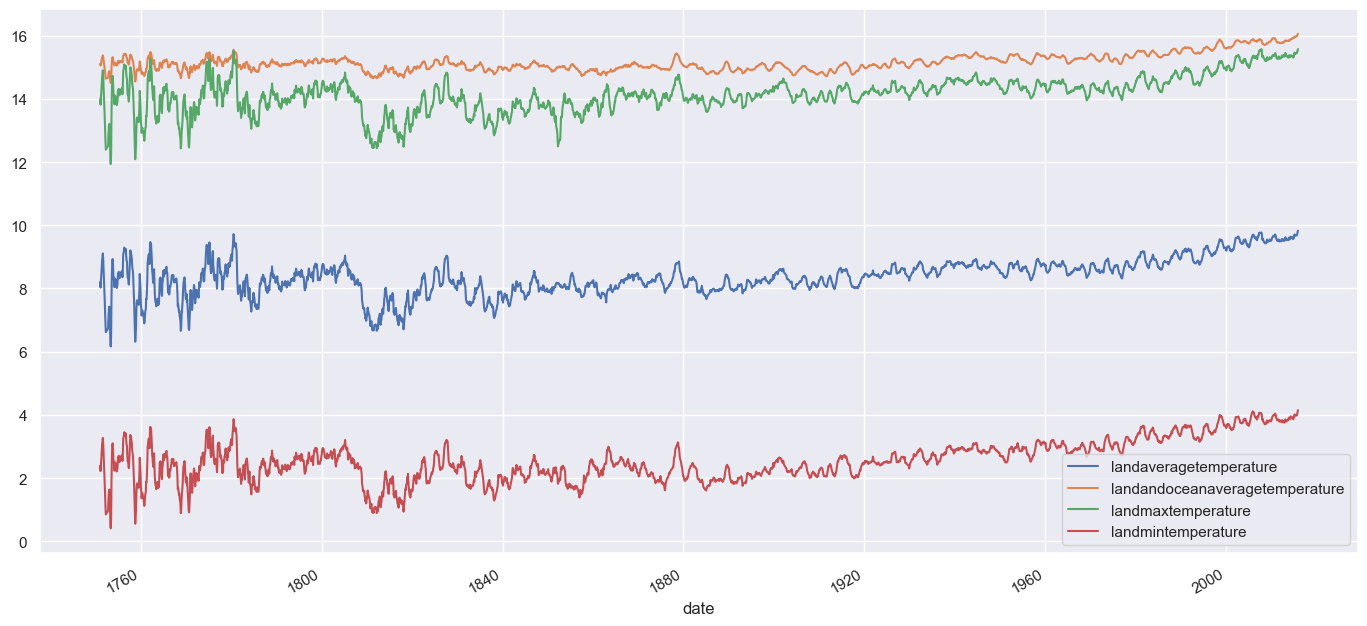

In [516]:
copy_data=df.copy()
copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].rolling(window=12).mean().plot(figsize=(17,8));

### *F.2 CMA - Cumulative Moving Avearge (yearly)*

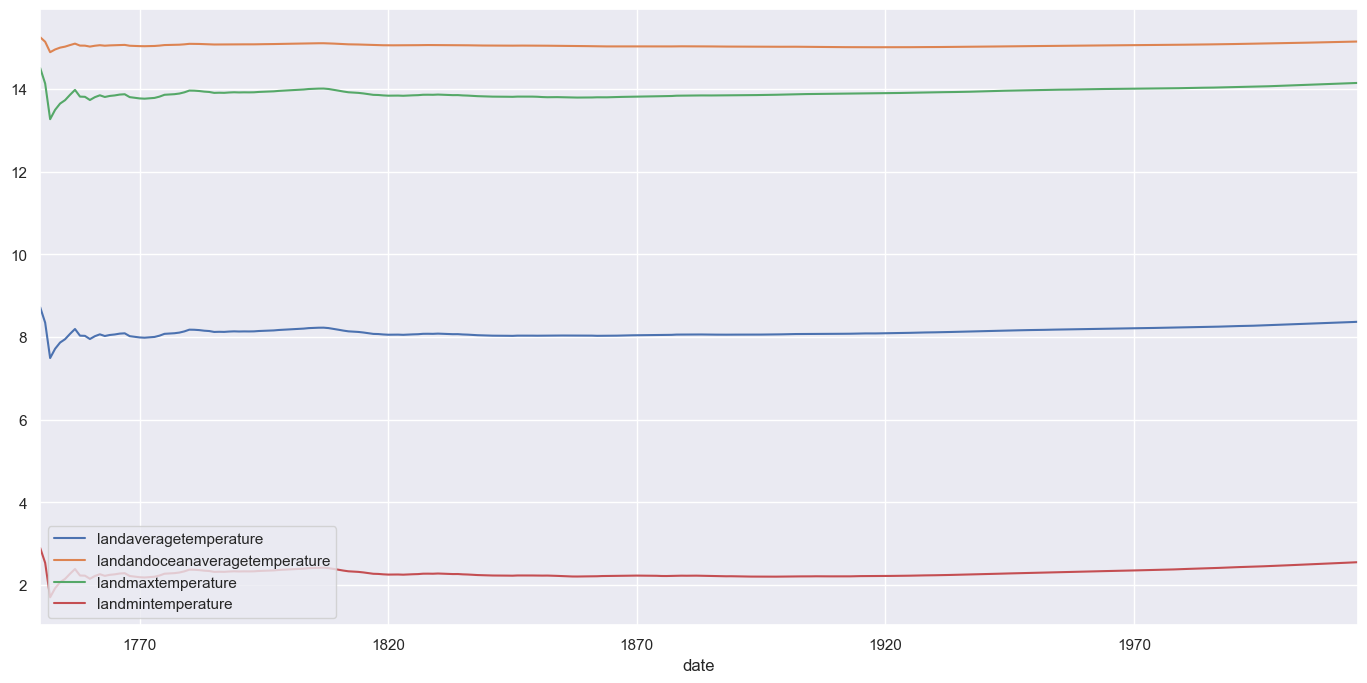

In [517]:
copy_data_y_resampled=copy_data[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].resample(rule="YS").mean()
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].expanding().mean().plot(figsize=(17,8));

### *F.3 EMA - Exponential Moving Average (yearly)*

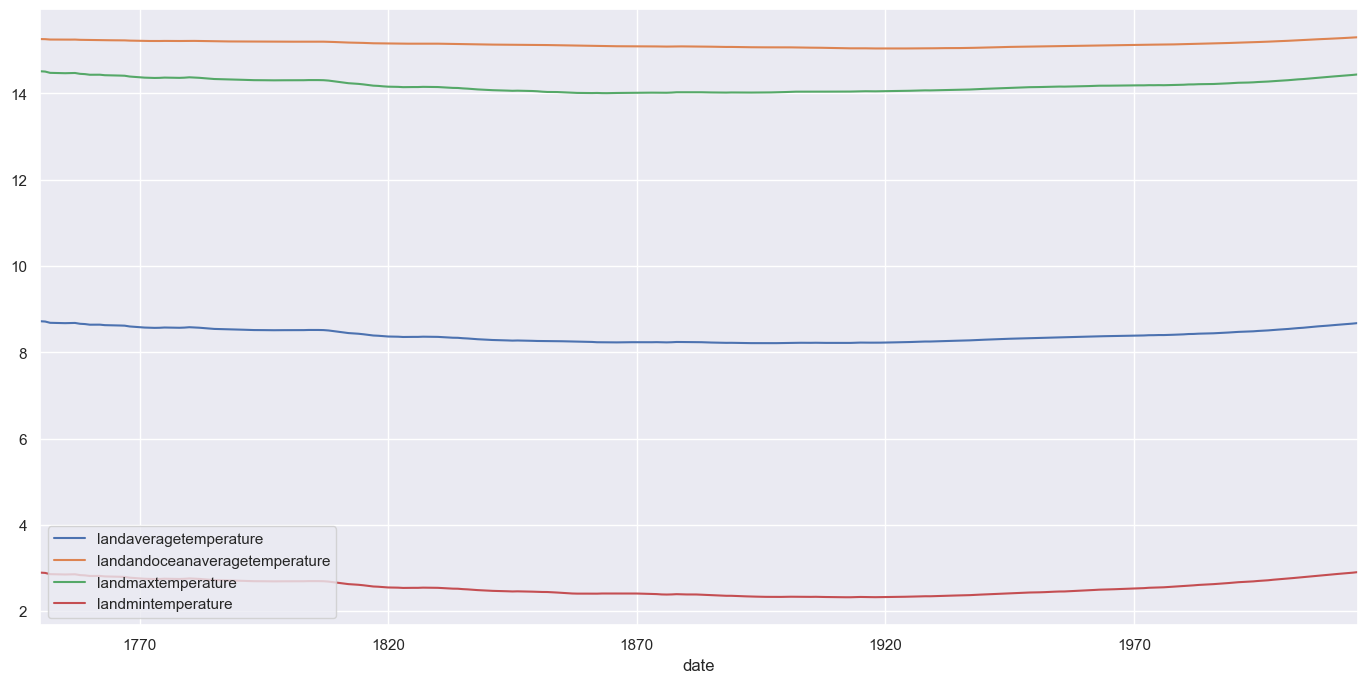

In [518]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(alpha=.01,adjust=False).mean().plot(figsize=(17,8));

### *F.4 EMWA - Exponential Moving Weighted Average -- this the is best method to use when it comes to times series analysus as this one gives weight for the most recent data values (yearly)*   

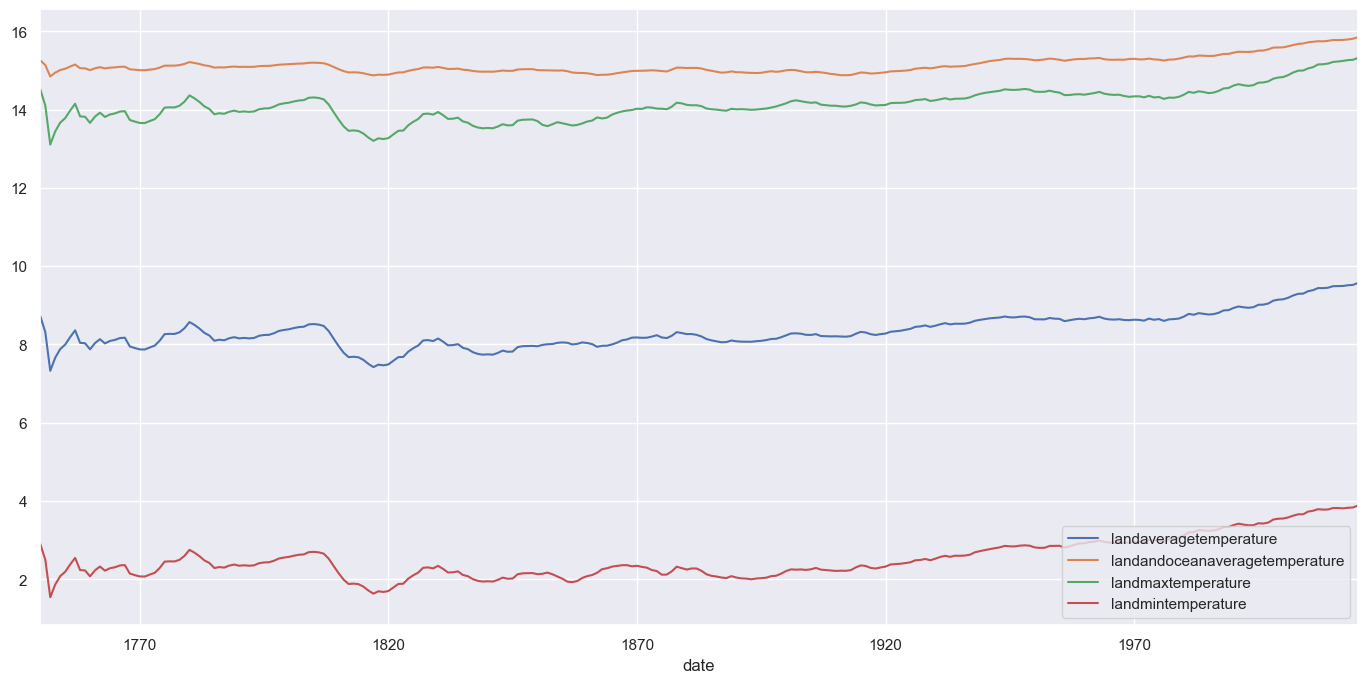

In [520]:
copy_data_y_resampled[["landaveragetemperature","landandoceanaveragetemperature","landmaxtemperature","landmintemperature"]].ewm(span=12).mean().plot(figsize=(17,8));

---

<a id="Some_Insights"></a>

## *G.* <u>*Some Insights*</u>

In [524]:
df.reset_index(inplace=True)

In [525]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month_name()
df["day"]=df["date"].dt.day_name()
df["quarter"]=df["date"].dt.quarter

In [527]:
df.set_index("date",inplace=True)

#### *G.1<BR>dataset date start*

In [528]:
df.index.min()

Timestamp('1750-01-01 00:00:00')

#### *G.2<BR>dataset date end*

In [529]:
df.index.max()

Timestamp('2015-12-01 00:00:00')

#### *G3<BR>the top 5 years that have the highest landaveragetemperature*

In [530]:
pd.DataFrame(df.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

,landaveragetemperature
year,
1761,19.021
1757,17.910
1774,16.521
1788,16.468
1763,16.391


#### *G.4<BR>the top 5 years that have the lowest landaveragetemperature*

In [531]:
pd.DataFrame(df.groupby(["year"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,landaveragetemperature
year,
1752,8.265
1770,11.884
1764,12.507
1810,12.551
1816,12.570


#### *G.5<BR>month ranking by landaveragetemperature from the highest to the lowest*

In [532]:
pd.DataFrame(df.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False))

,landaveragetemperature
month,
July,19.021
August,17.910
June,17.115
May,16.025
September,14.852
April,13.732
October,10.801
November,8.179
March,7.787


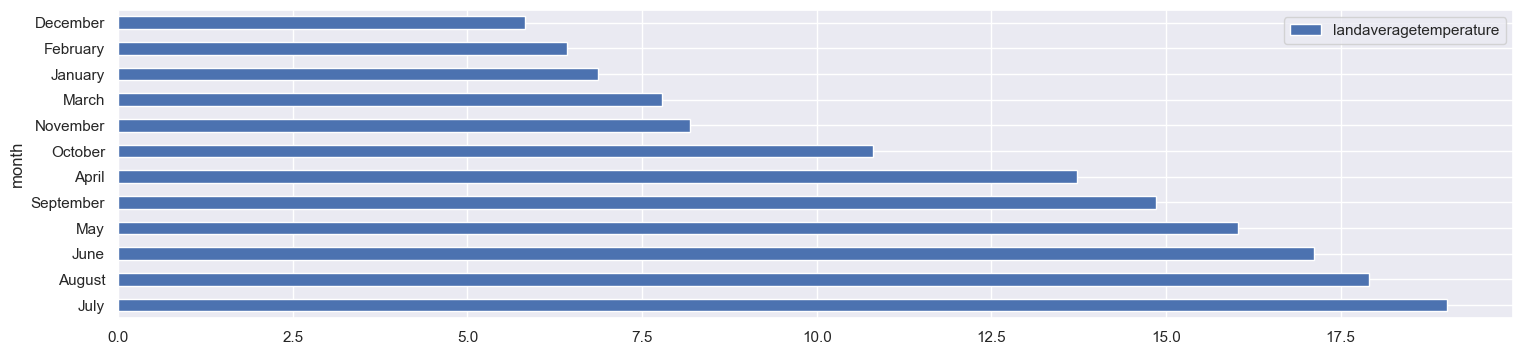

In [533]:
pd.DataFrame(df.groupby(["month"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,4));

#### *G.6<BR>decade ranking by landaveragetemperature from the highest to the lowest*

In [534]:
pd.DataFrame(df.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False))

,landaveragetemperature
quarter,
3,19.021
2,17.115
4,10.801
1,7.787


<Axes: ylabel='quarter'>

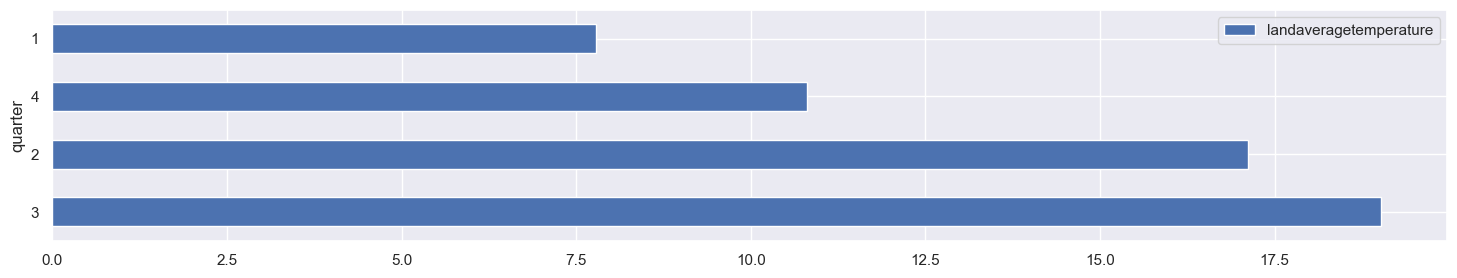

In [535]:
pd.DataFrame(df.groupby(["quarter"])["landaveragetemperature"].max().sort_values(ascending=False)).plot(kind="barh",figsize=(18,3))

#### *G.7<BR>the top 5 years/months in combination that have the highest landaveragetemperature*

In [537]:
pd.DataFrame(df.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=False)).head()

landaveragetemperature
year month                         
1761 July                    19.021
1757 August                  17.910
     July                    17.610
     June                    17.115
1761 June                    16.821

#### *G.8<BR>the top 5 years/months in combination that have the lowest landaveragetemperature*

In [538]:
pd.DataFrame(df.groupby(["year","month"])["landaveragetemperature"].max().sort_values(ascending=True)).head()

,,landaveragetemperature
year,month,
1768,January,-2.080
1758,January,-1.503
1783,January,-1.431
1813,January,-1.385
1754,February,-1.249


---

<a id="Feature_Engineering"></a>

## *H.* <u>*Feature Engineering*</u>

In [539]:
shift= [36]
for s in shift:
    df[f"landandoceanaveragetemperature_shift_{s}"]=df["landandoceanaveragetemperature"].shift(s)
    df[f"landandoceanaveragetemperatureuncertainty_shift_{s}"]=df["landandoceanaveragetemperatureuncertainty"].shift(s)
    df[f"landaveragetemperature_shift_{s}"]=df["landaveragetemperature"].shift(s)
    df[f"landaveragetemperatureuncertainty_shift_{s}"]=df["landaveragetemperatureuncertainty"].shift(s)
    df[f"landmaxtemperature_shift_{s}"]=df["landmaxtemperature"].shift(s)
    df[f"landmaxtemperatureuncertainty_shift_{s}"]=df["landmaxtemperatureuncertainty"].shift(s)
    df[f"landmintemperature_shift_{s}"]=df["landmintemperature"].shift(s)
    df[f"landmintemperatureuncertainty_shift_{s}"]=df["landmintemperatureuncertainty"].shift(s)

In [540]:
df.dropna(axis=0,how="any",inplace=True)

In [542]:
df.shape

(3144, 20)

---

<a id="Feature_Selection"></a>

## *I.* <u>*Feature Selection*</u>

### *defining x & y*

In [546]:
x=df.drop(["landaveragetemperature","year","month","day","quarter"],axis=1)
y=df["landaveragetemperature"]

### *I.1 SelectKBest -Selecting the best 3 features based on the best score*

In [547]:
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression  
best=SelectKBest(score_func=f_regression,k=10).fit(x,y)
features_score=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(best.scores_)],axis=1)
features_score.columns=["feature","score"]
print(features_score.shape[0])
features_score.sort_values(by="score",ascending=False)

15


,feature,score
1,landmaxtemperature,619839.760813
3,landmintemperature,592033.589737
5,landandoceanaveragetemperature,214748.419918
9,landaveragetemperature_shift_36,41048.517582
11,landmaxtemperature_shift_36,39169.498618
13,landmintemperature_shift_36,39128.322757
7,landandoceanaveragetemperature_shift_36,34030.686675
14,landmintemperatureuncertainty_shift_36,145.268233
4,landmintemperatureuncertainty,139.380643
10,landaveragetemperatureuncertainty_shift_36,137.903849


### *I.2 ExtraTreesRegressor -Selecting the best 3 features based on the best importance*

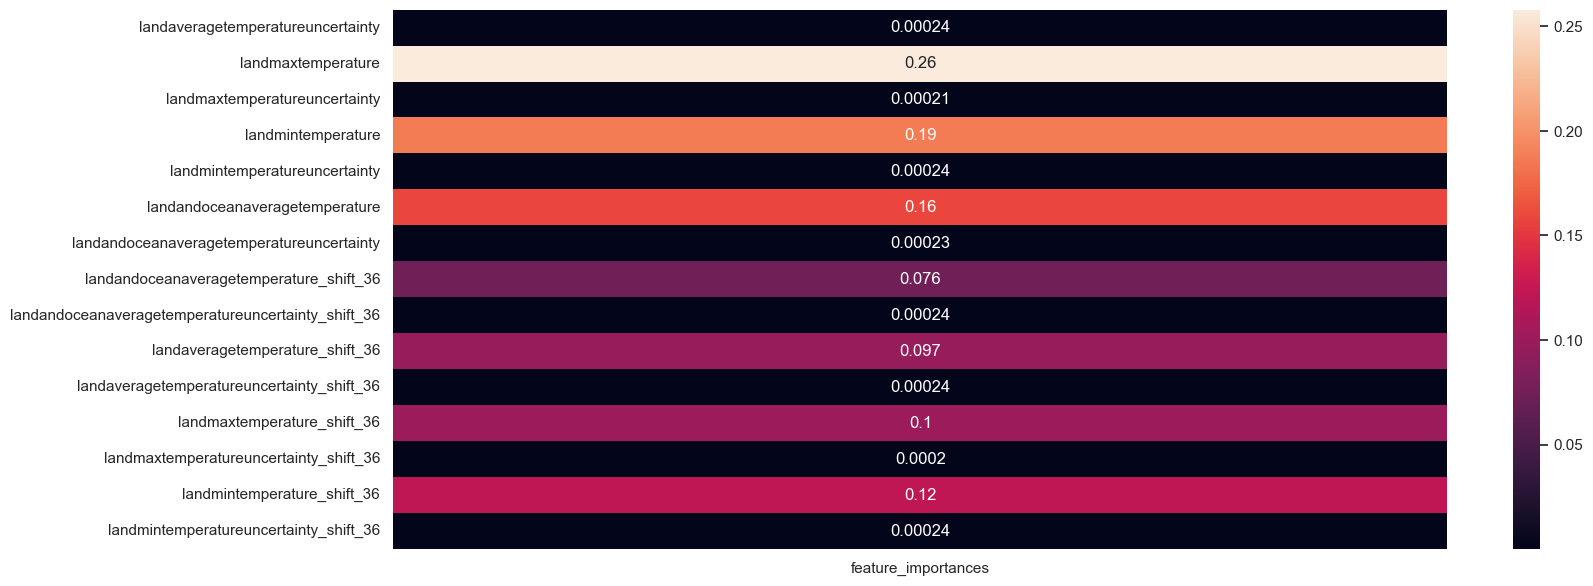

In [548]:
from sklearn.ensemble import  ExtraTreesRegressor
best=ExtraTreesRegressor().fit(x,y)
fig, ax = plt.subplots(figsize=(17, 7))
sns.heatmap(pd.DataFrame({"feature_importances":best.feature_importances_},best.feature_names_in_),annot=True);

### *I.3 Creating new dataset with the best features then looking at the correlation between them to confirm they are highly correlated*

In [551]:
data=x[["landmaxtemperature","landmintemperature","landandoceanaveragetemperature","landaveragetemperature_shift_36","landmaxtemperature_shift_36",
        "landmintemperature_shift_36","landandoceanaveragetemperature_shift_36"]]
data=pd.concat([y,data],axis=1)

<a id="Features_developments"></a>

In [553]:
data.head()

,landaveragetemperature,landmaxtemperature,landmintemperature,landandoceanaveragetemperature,landaveragetemperature_shift_36,landmaxtemperature_shift_36,landmintemperature_shift_36,landandoceanaveragetemperature_shift_36
date,,,,,,,,
1754-01-01,1.574,7.308,-4.051,13.151,3.034,8.780,-2.632,13.581
1754-02-01,-1.249,4.462,-6.795,12.319,3.083,8.829,-2.584,13.596
1754-03-01,3.677,9.428,-2.007,13.771,5.626,11.393,-0.112,14.345
1754-04-01,11.610,17.425,5.704,16.109,8.490,14.280,2.672,15.189
1754-05-01,11.936,17.754,6.021,16.205,11.573,17.388,5.668,16.098


---

<a id="Analysis_conducting"></a>

## *J.* <u>*Analysis Moduling*</u>

+ *Since we are applying SARIMAX, the modul automatically will handle the targeted feature it is not stationary*
+ *We will convert the exogenous features to stationaty in case found notthen add the new stationary features to the data set*

In [554]:
from statsmodels.tsa.stattools import adfuller
i=0
features=data
for x in features:
     results=adfuller(data.values[:,i])[1]
     if results > 0.05:
       print(data.columns[i] ," ",results)
     i +=1

landandoceanaveragetemperature   0.14404435341565824


In [555]:
adfuller(data["landandoceanaveragetemperature"].diff().dropna())
data["landandoceanaveragetemperature_1st_diff"]=data["landandoceanaveragetemperature"].diff()
data.dropna(axis=0,how="any",inplace=True)

### *J.1 ACF & PACF plots to determint the number of lags we need to use in our modul*

In [556]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict,acf,pacf

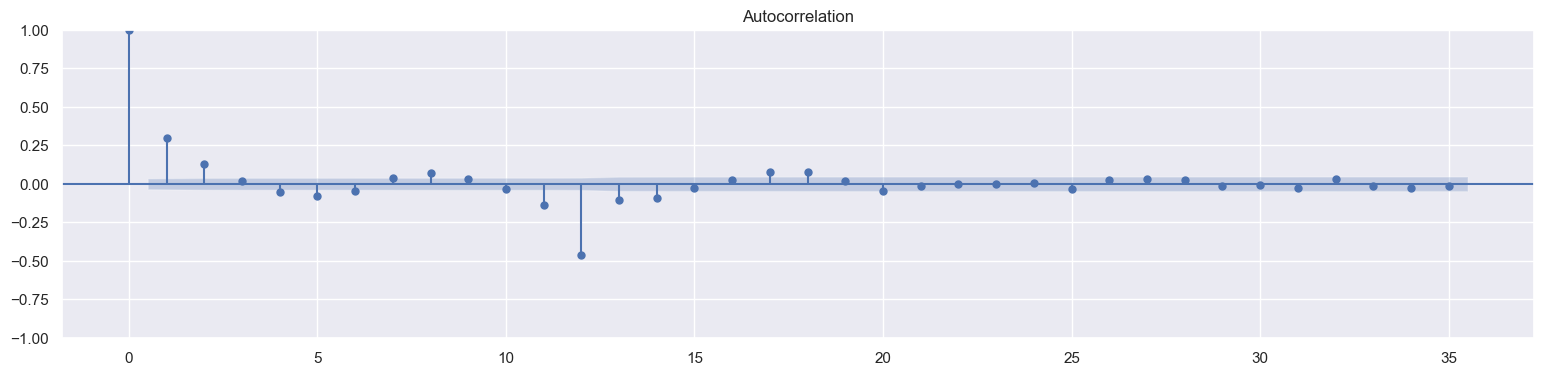

In [557]:
plot_acf(data["landaveragetemperature"].diff(12).dropna()).set_size_inches(19,4);

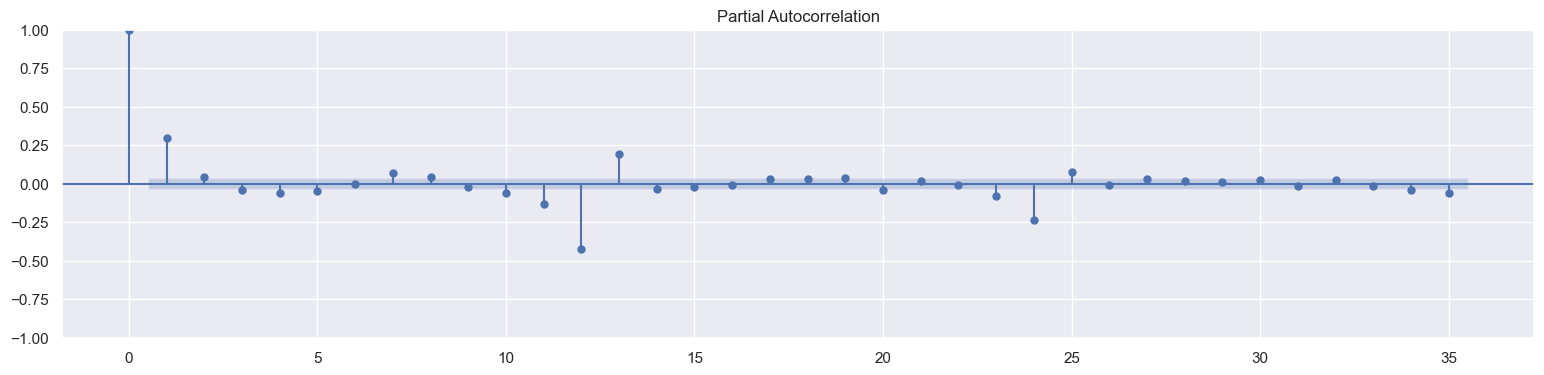

In [558]:
plot_pacf(data["landaveragetemperature"].diff(12).dropna()).set_size_inches(19,4);

#### *-->We will determine the (p,d,q)valus as : (1,0,1)*  
#### *-->We will determine the (P,D,Q)valus as : (1,0,1,12)*  

### *J.2 Applying SARIMAX function as we have excagenous fetures to be included*

In [559]:
import statsmodels.api as sm
modul_sarimax=sm.tsa.SARIMAX(data["landaveragetemperature"],order=(1,0,1),seasonal_order=(1,0,1,12),
                             exog=data[["landandoceanaveragetemperature_1st_diff","landmaxtemperature","landmintemperature"]]).fit()
print(modul_sarimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:             landaveragetemperature   No. Observations:                 3143
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 344.169
Date:                            Wed, 20 Sep 2023   AIC                           -672.339
Time:                                    18:49:47   BIC                           -623.916
Sample:                                02-01-1754   HQIC                          -654.962
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
landandoceanaveragetemperature_1st_diff     0.0398      

### *J.3 Determining the the train the test data intervals*

In [579]:
from datetime import datetime,timedelta
train_data_end=datetime(2012,12,1)
test_data_end=datetime(2015,12,1)

In [580]:
train_data=data[:train_data_end]
test_data=data[train_data_end+timedelta(days=1):test_data_end]

In [581]:
prediction_start_date=test_data.index[0]
prediction_end_date=test_data.index[-1]

### *J.4 Applying Prediction Function*

In [588]:
Prediction_sarimax=modul_sarimax.predict(start=prediction_start_date,end=prediction_end_date,
                                        exog=test_data[["landmaxtemperature_shift_36","landmintemperature_shift_36",
                                                               "landandoceanaveragetemperature_shift_36"]])

In [589]:
test_data["prediction_sarimax"]=Prediction_sarimax

### *J.5 Modul Accuracy*

#### *J.5.1 Plotting the prediction results along with the test data to determine how our modul is fit*

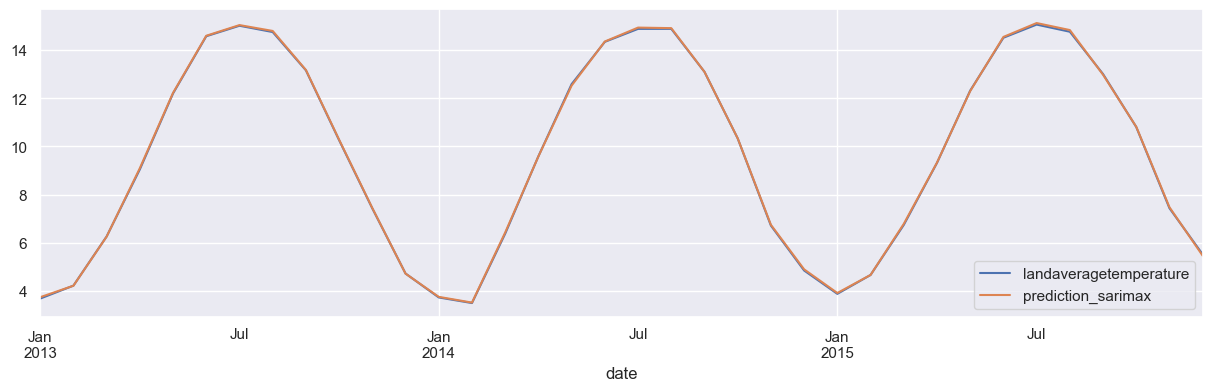

In [607]:
test_data[["landaveragetemperature","prediction_sarimax"]].plot(figsize=(15,4));

#### *J.5.2 Calculating the mse & mae*

In [591]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [592]:
np.sqrt(mean_squared_error(test_data["landaveragetemperature"],Prediction_sarimax))

0.035108852233165094

In [593]:
mean_absolute_error(test_data["landaveragetemperature"],Prediction_sarimax)

0.028923827598750576

### *J.6 Future Prediction-forcasting*

#### *J.6.1 Creating forcasting dates ranges from 2016,2017,2018*

In [594]:
future_date_index=pd.date_range(start="2015-12-01",end="2018-12-01",freq="MS")
future_date=pd.DataFrame({"date":future_date_index})

#### *J.6.2 Applying forcasting*

In [595]:
gg=modul_sarimax.get_forecast(steps=36,exog=test_data[["landmaxtemperature_shift_36","landmintemperature_shift_36",
                                                               "landandoceanaveragetemperature_shift_36"]])  
forcast_result =pd.DataFrame(gg.predicted_mean) 
forcast_result=forcast_result.reset_index()
forcast_result["date"]=future_date
forcast_result=forcast_result.set_index("date").drop("index",axis=1)

In [598]:
test_predicted_together=pd.concat([train_data,test_data,future_date.set_index("date")])
test_predicted_together["forcasting"]=forcast_result

#### *J.6.3 Plotting our forcasr results*

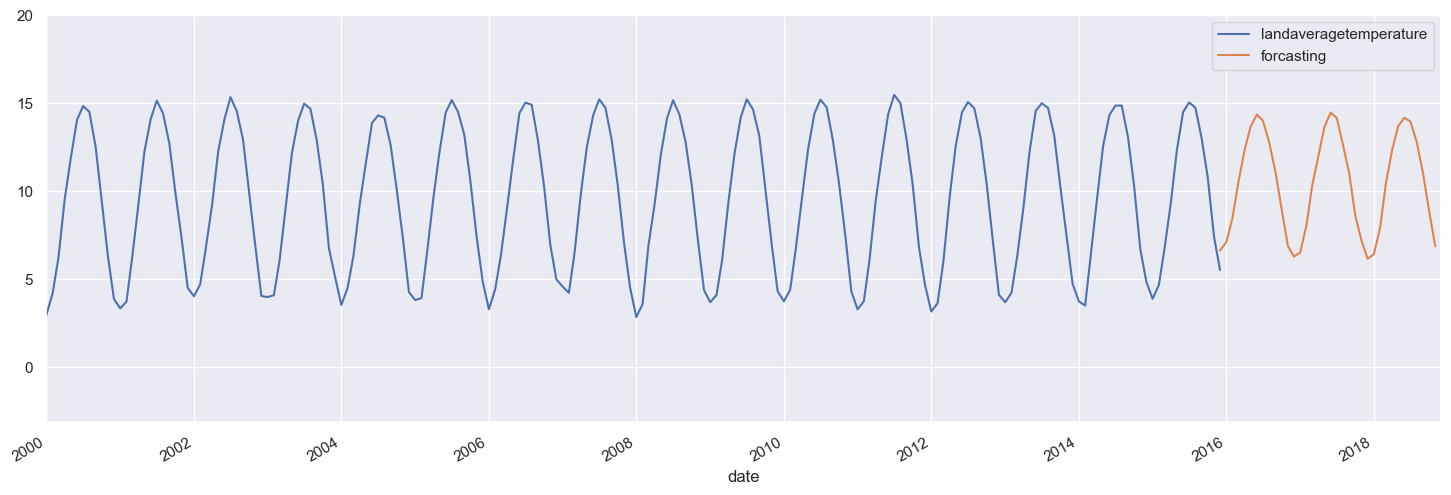

In [601]:
test_predicted_together[["landaveragetemperature","forcasting"]].plot(figsize=(18,6),xlim=["2000-01-01","2018-12-01"]);
# forcast_result.plot(figsize=(15,5));

---
---